# conclusion drawn
This notebook does a experiment on a node of femnist, which has id "f0095_41".
The result shows that given more epochs of local training and decay of learning rate
This node gets better testing accuracy than the normal training epochs.
So if we found those nodes by computing distance to the average center, and 
we apply the more epochs training on them, we should gain better performance.

Accuracy of normal training (epochs=1) raises from 0.42 up to 0.78, notably improvement.

In [1]:
%matplotlib inline

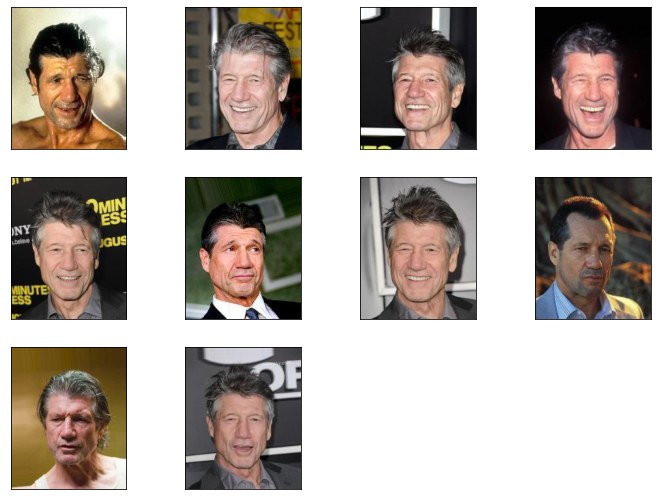

001314.jpg
015880.jpg
032495.jpg
042144.jpg
059223.jpg
061290.jpg
106389.jpg
107170.jpg
110259.jpg
150787.jpg


In [2]:
import random
from show_cels import get_metadata, get_celebrities_and_images, show_by_cel
# identities, _ = get_metadata()
# paths = get_celebrities_and_images(identities)
# cels = list(paths.keys())
# random.shuffle(cels)
# print(cels[0])

paths = show_by_cel('3287')
for i in paths:
    print(i)

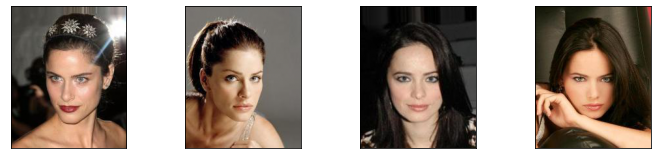

In [3]:
from show_cels import show_by_file

f = ['071084.jpg', '034927.jpg', '001638.jpg', '044187.jpg']
show_by_file(f)

In [ ]:
f = ['085787.jpg', '099048.jpg', '170182.jpg', '032495.jpg']

[845, 3027, 1706, 229, 3349, 1616]


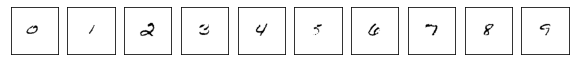

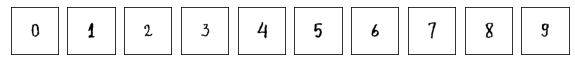

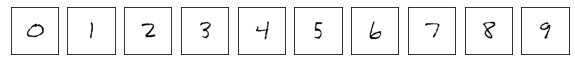

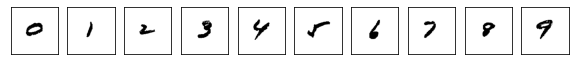

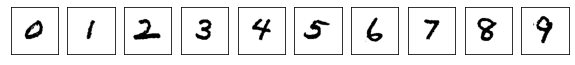

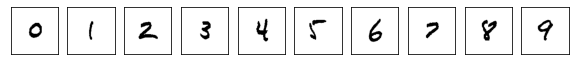

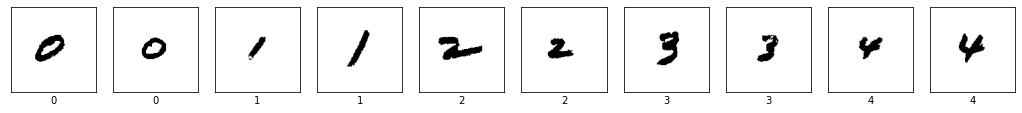

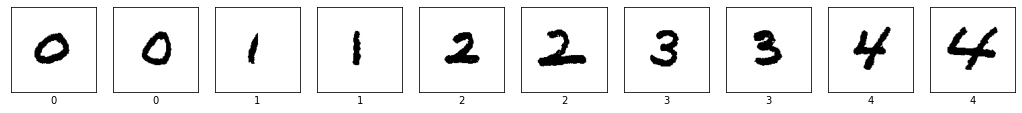

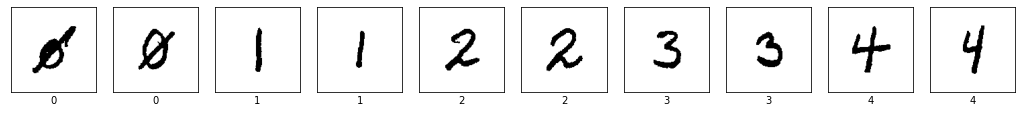

In [1]:
from show_imgs import show_digits, plot_writers
import matplotlib.pyplot as plt

writers = [845, 3027, 1706, 229, 3349, 1616]
print(writers)
plot_writers(writers)

In [ ]:
import os
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
import numpy as np


from cnn_keras import ClientModel

client_model = ClientModel(1234, lr=0.003)

cnn = client_model.create_CNNmodel()
path = os.path.join("..", "checkpoints", "femnist", "model.ckpt")
cnn.load_weights(path)
# cnn.summary()

# Create clients

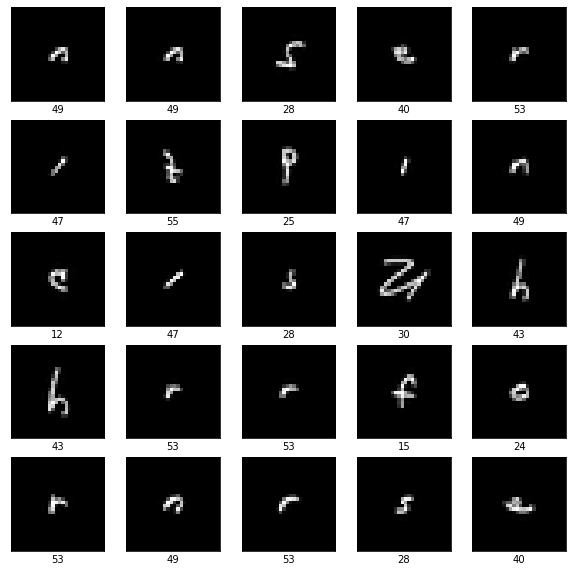

In [3]:
import os
import sys
import numpy as np
from PIL import Image

utils_dir = os.path.dirname(os.path.abspath(''))
utils_dir = os.path.join(utils_dir, 'utils')
sys.path.append(utils_dir)

from model_utils import read_data

dataset = 'femnist'
train_data_dir = os.path.join('..', '..', 'data', dataset, 'data', 'train')
test_data_dir = os.path.join('..', '..',  'data', dataset, 'data', 'test')   
users, groups, train_data, test_data = read_data(train_data_dir, test_data_dir)

parent_path = os.path.join('..', '..', 'pkl')
by_writer_dir = os.path.join(parent_path, 'images_by_writer')
print(by_writer_dir)

writers = load_obj(by_writer_dir)
num_json = int(math.ceil(len(writers) / MAX_WRITERS))
print(num_json)


# Create clients
_users = users

# Show image from one clients
img_blocks = train_data['f0095_41']['x']

def res_img(img):
    return np.array(img).reshape((28, 28))

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(res_img(img_blocks[i]), cmap=plt.cm.binary)
    plt.xlabel(train_data['f0095_41']['y'][i])
plt.show()

# Show image from one writer, compared to others

# train_bs = [4, 8, 12, 16, 24]


# c_m = ClientModel(1234, lr=0.0003, train_bs=train_bs[2])
# ds = c_m.create_dataset(train_data['f0095_41'], set_to_use='train')
# cnn.fit(ds, epochs=15)
# test = c_m.create_dataset(test_data['f0095_41'], set_to_use='test')
# cnn.evaluate(test)
    
#print(img_blocks)

In [6]:
cnn.evaluate(test)

3/3 [==============================] - 0s 4ms/step - loss: 2.0953 - acc: 0.7805


[2.095323644578457, 0.7804878]

In [2]:
%%writefile show_imgs.py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec


import pickle
import math
import os
import numpy as np
import random
from PIL import Image

DICT_1 = [i for i in range(5)]
DICT_2 = [i for i in range(5)]

def relabel_class(c):
    '''
    maps hexadecimal class value (string) to a decimal number
    returns:
    - 0 through 9 for classes representing respective numbers
    - 10 through 35 for classes representing respective uppercase letters
    - 36 through 61 for classes representing respective lowercase letters
    '''
    if c.isdigit() and int(c) < 40:
        return (int(c) - 30)
    elif int(c, 16) <= 90: # uppercase
        return (int(c, 16) - 55)
    else:
        return (int(c, 16) - 61)

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
def take_class(elem):
    return relabel_class(elem[1])
    
parent_path = os.path.join('..', '..', 'pkl')
by_writer_dir = os.path.join(parent_path, 'images_by_writer')

writers = load_obj(by_writer_dir)

def index_class(digit, sub_l):
    # reture structure is [file_path of images of this class]
    imgs_by_class = []
    for (f, c) in sub_l:
        if relabel_class(c) == digit:
            imgs_by_class.append(f)
    random.shuffle(imgs_by_class)
    return imgs_by_class
        

def show_digits(j):
    plt.figure(figsize=(18,2))
    (w, l) = writers[j]
    sub_l = l
    sub_l.sort(key=take_class)

    i = 0
    my_dict = []
    my_dict.extend(DICT_1)
    my_dict.extend(DICT_2)
    for (f, c) in sub_l:
        if (relabel_class(c) in my_dict) and (len(my_dict) > 0):
            file_path = os.path.join(parent_path, f)
            img = Image.open(file_path)
            rgb = np.array(img).copy()
            plt.subplot(1, 10,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(rgb / 255.0, cmap=plt.cm.binary)
            plt.xlabel(relabel_class(c))
            i += 1
            my_dict.remove(relabel_class(c))
        else:
            pass        

    plt.show()

def ten_digits_in_ord(j):
    (w, l) = writers[j]
    
    digits = [i for i in range(10)]
    i = 0
    for k in digits:
        imgs = index_class(k, l)
        file_path = os.path.join(parent_path, imgs[0])
        img = Image.open(file_path)
        rgb = np.array(img).copy()
        plt.subplot(1, 10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(rgb / 255.0, cmap=plt.cm.binary)
        i += 1
        
#     plt.show()
    
def plot_writers(seqs):    
    for w in seqs:
        plt.figure(figsize=(10, 1))
        gs1 = gridspec.GridSpec(10, 1)
        gs1.update(wspace=0.025, hspace=0.025) 
        ten_digits_in_ord(w)
        plt.savefig("{}.png".format(w), dpi=100)
        plt.show()

Overwriting show_imgs.py


In [2]:
%%writefile show_cels.py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

import os
import numpy as np
import random
from PIL import Image

root_path = os.path.dirname(os.path.dirname(os.path.abspath('')))
## change this to your folder of raw of celeba faces
parent_path = os.path.join(root_path, "..",  "..", "multi-center-fed-learning","data", "celeba")
rawdata_path = os.path.join(parent_path, 'data', 'raw', 'img_align_celeba')

def get_metadata():
    f_identities = open(os.path.join(
        parent_path, 'data', 'raw', 'identity_CelebA.txt'), 'r')
    identities = f_identities.read().split('\n')

    f_attributes = open(os.path.join(
        parent_path, 'data', 'raw', 'list_attr_celeba.txt'), 'r')
    attributes = f_attributes.read().split('\n')

    return identities, attributes


def get_celebrities_and_images(identities):
    all_celebs = {}
    for line in identities:
        info = line.split()
        if len(info) < 2:
            continue
        image, celeb = info[0], info[1]
        if celeb not in all_celebs:
            all_celebs[celeb] = []
        all_celebs[celeb].append(image)

    good_celebs = {c: all_celebs[c] for c in all_celebs if len(all_celebs[c]) >= 5}
    return good_celebs
    
cels = get_celebrities_and_images(get_metadata()[0])
        

def show_by_cel(j):
    plt.figure(figsize=(12, 12))
    p = cels[j]
    tot_imgs = 4 * 4
    if len(p) > tot_imgs:
        sub_cel = p[:tot_imgs]
    else:
        sub_cel = p

    i = 0
    for f in sub_cel:
        file_path = os.path.join(rawdata_path, f)
        img = Image.open(file_path)
        rgb = np.array(img).copy()
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.imshow(rgb /255.0)
        i += 1

    plt.show()
    
    return sub_cel

def show_by_file(files):
    plt.figure(figsize=(12, 12))
    
    i = 0
    for f in files:
        file_path = os.path.join(rawdata_path, f)
        img = Image.open(file_path)
        rgb = np.array(img).copy()
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(rgb /255.0)
        i += 1

    plt.show()    

Overwriting show_cels.py
